In [ ]:
import pandas as pd
from predict import predict_test_folds, _latest_preds_file
from evaluate import evaluate_predictions
from portfolio import save_ret_mat, save_portfolios, save_alpha_metrics
import os
import logging
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [22]:
port_path = '/Users/cyang/src/polymer_output/features_3_8/portfolio/pos_raw_ridge.csv'
port_df = pd.read_csv(port_path, parse_dates=['date'], index_col='date')
port_df


,BBG000B9X8C0,BBG000B9XG87,BBG000B9XRY4,BBG000B9XYV2,BBG000B9YJ35,BBG000B9Z0J8,BBG000B9ZGM9,BBG000B9ZV28,BBG000B9ZXB4,BBG000BB03M1,...,BBG01BGWHFR5,BBG01C79X561,BBG01F6N6NM7,BBG01G9JKWV5,BBG01GZF9VY6,BBG01H51WYQ5,BBG01H9FTGX5,BBG01K8GRMX6,BBG01MMT6PL7,BBG01NMRD768
date,,,,,,,,,,,,,,,,,,,,,
2018-01-05,0.000000,0.002743,0.001361,0.000000,0.001250,0.000000,0.0,0.0,0.002557,0.002652,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2018-01-10,0.002009,0.004163,0.002084,0.000000,0.002377,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2018-01-11,0.002179,0.003475,0.000927,0.001819,0.000000,0.000000,0.0,0.0,0.000000,0.002104,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2018-01-12,0.002531,0.002572,0.000921,0.002970,0.003214,0.003333,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2018-01-18,0.002363,0.002000,0.000925,0.001858,0.002925,0.001894,0.0,0.0,0.002375,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-16,0.001578,0.001669,0.001203,0.001912,0.002202,0.001080,0.0,0.0,0.000610,0.000000,...,0.002377,0.001407,0.0,0.002252,0.0,0.0,0.0,0.000000,0.002203,0.001597
2024-08-21,0.001884,0.001324,0.001225,0.001836,0.002281,0.001673,0.0,0.0,0.002183,0.000000,...,0.000000,0.001171,0.0,0.000000,0.0,0.0,0.0,0.002193,0.002114,0.001776
2024-08-22,0.002673,0.001684,0.001229,0.003062,0.000000,0.002380,0.0,0.0,0.002037,0.000000,...,0.002384,0.000621,0.0,0.000000,0.0,0.0,0.0,0.000000,0.001274,0.000000


In [26]:
(port_df<0).sum(axis=1)

date
2018-01-05     4
2018-01-10     5
2018-01-11     3
2018-01-12     7
2018-01-18     6
              ..
2024-08-16    11
2024-08-21    12
2024-08-22    16
2024-08-23    15
2024-08-28     8
Length: 966, dtype: int64

In [2]:
OUT_DIR = "/Users/cyang/src/polymer_output"
MODELS = [
    # "linreg",
    # "ridge",
    # "lasso",
    # "elasticnet",
    # "rf",
    "lgbm",
]

In [3]:
model = "lgbm"

preds_file = os.path.join(OUT_DIR, 'preds_all', f'{model}.csv')
preds = pd.read_csv(preds_file, parse_dates=["date"])


In [4]:
preds

,split,model,date,stockid,y_true,y_pred
0,1,lgbm,2018-01-03,BBG000B9XG87,-0.002568,0.000978
1,1,lgbm,2018-01-03,BBG000B9XRY4,0.011385,0.000232
2,1,lgbm,2018-01-03,BBG000B9YJ35,0.012185,0.000868
3,1,lgbm,2018-01-03,BBG000B9ZXB4,0.002890,0.000250
4,1,lgbm,2018-01-03,BBG000BB03M1,0.006132,0.000699
...,...,...,...,...,...,...
1012458,11,lgbm,2024-08-28,BBG019Q32XJ9,0.005545,0.000697
1012459,11,lgbm,2024-08-28,BBG01BFR8YV1,0.008801,0.000785
1012460,11,lgbm,2024-08-28,BBG01C79X561,0.009195,0.000680
1012461,11,lgbm,2024-08-28,BBG01K8GRMX6,-0.004321,0.000350


In [5]:
metrics = evaluate_predictions(
    preds_df=preds,
    by_date_ic=True,
    out_csv=os.path.join(OUT_DIR, f"metrics_{model}.csv"),
)
print(metrics)

    split split_start  split_end model   n_obs      rmse       mae        r2  \
0       1  2018-01-03 2018-08-08  lgbm   78013  0.021620  0.013803 -0.002680   
1       2  2018-08-09 2019-03-20  lgbm   83227  0.026912  0.015095 -0.001423   
2       3  2019-03-21 2019-10-23  lgbm   76305  0.021988  0.014161 -0.007837   
3       4  2019-10-24 2020-06-16  lgbm   90484  0.045436  0.028076 -0.001502   
4       5  2020-06-17 2021-01-21  lgbm   93186  0.032265  0.019184 -0.011718   
5       6  2021-01-22 2021-08-26  lgbm   95870  0.030905  0.017436 -0.005183   
6       7  2021-08-27 2022-04-01  lgbm   99942  0.030073  0.018737 -0.008204   
7       8  2022-04-04 2022-11-07  lgbm  102326  0.032054  0.021807 -0.005800   
8       9  2022-11-08 2023-06-15  lgbm  100407  0.028173  0.017308 -0.003551   
9      10  2023-06-16 2024-01-23  lgbm   93068  0.024483  0.015048 -0.008038   
10     11  2024-01-24 2024-08-28  lgbm   99635  0.024823  0.015023 -0.007657   

     pearson  spearman  avg_date_ic  
0

In [10]:
metrics

,split,split_start,split_end,model,n_obs,rmse,mae,r2,pearson,spearman,avg_date_ic
0,1,2018-01-03,2018-08-08,lgbm,78013,0.021620,0.013803,-0.002680,-0.000586,0.006373,0.005654
1,2,2018-08-09,2019-03-20,lgbm,83227,0.026912,0.015095,-0.001423,0.002632,0.012853,0.003153
2,3,2019-03-21,2019-10-23,lgbm,76305,0.021988,0.014161,-0.007837,-0.009435,-0.003738,-0.002182
3,4,2019-10-24,2020-06-16,lgbm,90484,0.045436,0.028076,-0.001502,0.001209,0.000123,0.002508
4,5,2020-06-17,2021-01-21,lgbm,93186,0.032265,0.019184,-0.011718,0.003512,0.003348,-0.000879
5,6,2021-01-22,2021-08-26,lgbm,95870,0.030905,0.017436,-0.005183,0.008484,0.006564,0.006797
6,7,2021-08-27,2022-04-01,lgbm,99942,0.030073,0.018737,-0.008204,-0.006129,-0.007469,-0.003400
7,8,2022-04-04,2022-11-07,lgbm,102326,0.032054,0.021807,-0.005800,0.003944,0.009529,0.000127
8,9,2022-11-08,2023-06-15,lgbm,100407,0.028173,0.017308,-0.003551,-0.001949,0.001873,0.004824
9,10,2023-06-16,2024-01-23,lgbm,93068,0.024483,0.015048,-0.008038,-0.008376,-0.002785,0.004153


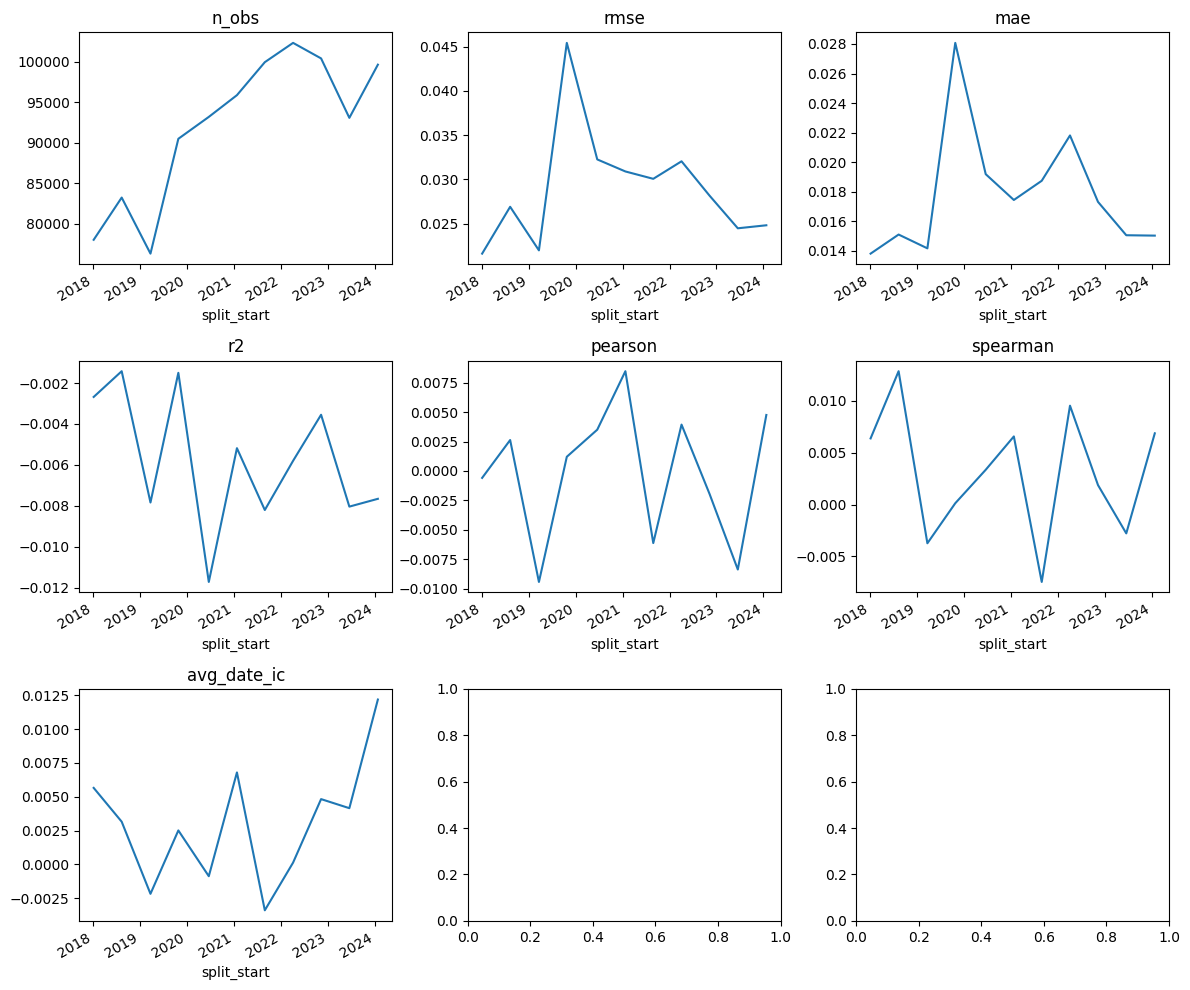

In [18]:
fig, ax = plt.subplots(3, 3, figsize=(12,10))
metrics_to_plot = [col for col in metrics.columns if col not in ['split', 'model', "split_start", 'split_end']]
to_plot = metrics.set_index('split_start')[metrics_to_plot]
# len of to_plot.columns and ax.flatten() do not match
for metric in to_plot.columns:
    to_plot[metric].plot(ax=ax.flatten()[metrics_to_plot.index(metric)], title=metric)




plt.tight_layout()


# make portfolios

In [19]:
preds

,split,model,date,stockid,y_true,y_pred
0,1,lgbm,2018-01-03,BBG000B9XG87,-0.002568,0.000978
1,1,lgbm,2018-01-03,BBG000B9XRY4,0.011385,0.000232
2,1,lgbm,2018-01-03,BBG000B9YJ35,0.012185,0.000868
3,1,lgbm,2018-01-03,BBG000B9ZXB4,0.002890,0.000250
4,1,lgbm,2018-01-03,BBG000BB03M1,0.006132,0.000699
...,...,...,...,...,...,...
1012458,11,lgbm,2024-08-28,BBG019Q32XJ9,0.005545,0.000697
1012459,11,lgbm,2024-08-28,BBG01BFR8YV1,0.008801,0.000785
1012460,11,lgbm,2024-08-28,BBG01C79X561,0.009195,0.000680
1012461,11,lgbm,2024-08-28,BBG01K8GRMX6,-0.004321,0.000350
